In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def plot_binary_loss(path, class_1, class_2, ax):
    title = 'Loss Binary ' + class_1 + ' and ' + class_2
    df = pd.read_csv(path)
    df.groupby('Epoch').Loss.plot(kind='line', legend=True, title=title, ax=ax, figsize=(15,8))
    ax.legend(loc='upper right')
    plt.xlabel('Step') 
    plt.ylabel('Loss')

In [3]:
def plot_test_distribution(path_test):
    title='Distribution on test set '
    df = pd.read_csv(path_test, index_col=0)
    df.CATEGORY.value_counts().plot(kind='pie', title=title)
    plt.plot()

Learning Curve

---

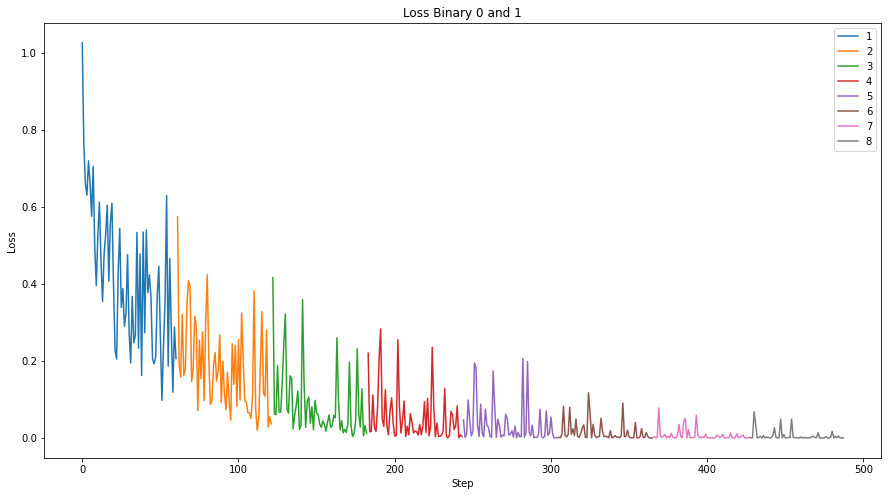

In [4]:
fig, axs = plt.subplots(1,1)
path = './0_1_results.csv'
class_1, class_2 = '0', '1'
plot_binary_loss(path, class_1, class_2, axs)

In [5]:
pathes = []
pathes.append('./0_1_matrix_report.csv')

In [6]:
def compare_accuracy(pathes, category, ax):
    data_frames = []
    comparisons = []
    for path in pathes:
        df = pd.read_csv(path, index_col=0)
        data_frames.append(df)
        comparisons.append(df.index[:2].values)
    results = []
    for i, df in enumerate(data_frames):
        comparison = comparisons[i]
        results.append({'accuracy': df.loc['accuracy'][0], 'model': comparison})
    df = pd.DataFrame(results)
    
    df = df[df.model.astype(str).str.contains(category)]
    
    title = 'accuracy ' + category 
    ax = df.sort_values(by='accuracy', ascending=False).plot(kind='bar', legend=True, title=title, x='model', ax=ax, rot=0)
    ax.legend(loc='lower right')
    for p in ax.patches:
        ax.annotate(str(round(p.get_height(), 3)), (p.get_x() * 1.005, p.get_height() * 1.005))

In [7]:
def compare_metric(pathes, category, metric, ax):
    data_frames = []
    comparisons = []
    for path in pathes:
        df = pd.read_csv(path, index_col=0)
        data_frames.append(df)
        comparisons.append(df.index[:2].values)
    results = []
    for i, df in enumerate(data_frames):
        comparison = str(comparisons[i])
        for _class in df[:2].index.values: 
            results.append({metric: df[:2][metric][_class], 'class': _class, 'model': comparison})
    
    df = pd.DataFrame(results)
    
    df = df[df.model.astype(str).str.contains(category)]
    
    df.set_index(['model', 'class'], inplace=True)
    
    title= metric + ' ' + category
    ax = df.unstack().plot.bar(rot=0, ax=ax, title=title)
    
    ax.legend(loc='lower right')
    for p in ax.patches:
        if p.get_height() > 0:
            ax.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005), fontsize=7)

In [8]:
def plot_result(category):

    fig, axs = plt.subplots(1,4)
    fig.set_figheight(5)
    fig.set_figwidth(15)

    compare_accuracy(pathes, category, ax=axs[0])

    metric = 'recall'
    compare_metric(pathes, category, metric, ax=axs[1])

    metric = 'precision'
    compare_metric(pathes, category, metric, ax=axs[2])

    metric = 'f1-score'
    compare_metric(pathes, category, metric, ax=axs[3])

### Category 0 : non-hate-speech
### Category 1 : nhate-speech

---

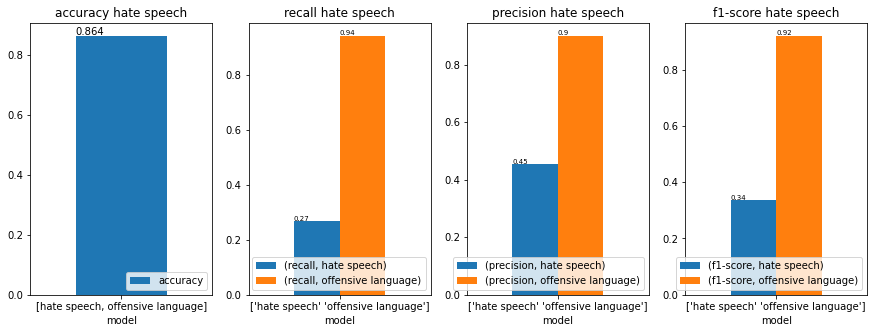

In [10]:
category = 'hate speech'
plot_result(category)

### Improvement b and t: business vs. science and technology

---

df = pd.read_csv(path, index_col=0)

df.head()

#### Class Distribution

is almost 50/50, nothing to improve

#### Hyperparameter tuning

fig, axs = plt.subplots(1,2)

path = './binary_problem_classes_b_t_results.csv'
class_1, class_2 = 'b', 't'
plot_binary_loss(path, class_1, class_2, axs[0])

path = r'C:\Users\Niklas\Google Drive\Uni Hamburg\Master\S2\NLP\workspace_5\plots_task_3\binary_problem_classes_b_t_results.csv'
class_1, class_2 = 't', 'm'
plot_binary_loss(path, class_1, class_2, axs[1])

-> set num_epochs 4

#### Testing another seed

seed -> 41, to avoid unlucky sample

### learing rate 

-> still converges

### Classifier KPI's

after

pathes = []
pathes.append(r'C:\Users\Niklas\Google Drive\Uni Hamburg\Master\S2\NLP\workspace_5\plots_task_3\binary_problem_classes_b_t_matrix_report.csv')
category = 't'
plot_result(category)

before

pathes = []
pathes.append(r'C:\Users\Niklas\Google Drive\Uni Hamburg\Master\S2\NLP\workspace_5\plots\binary_problem_classes_b_t_matrix_report.csv')
category = 't'
plot_result(category)

-> no improvement